In [1]:
import pandas as pd
from main import main, Config
import matplotlib.pyplot as plt
import random

plt.rcParams["figure.figsize"] = (16,10)


In [2]:
timer = 0

df = pd.DataFrame()
calc = [450, 200, 250]
show = [400 ,300, 200]
for i in range(len(calc)):
    random.seed(10)
    config_obj = Config(width=100,
                        height=100,
                        normal_vessels_count=calc[i],
                        rogue_vessels_count=10,
                        ground_stations_count=0,
                        clique_dist=10,
                        time_quanta=0.01,
                        ttl_acknowledgement=0.1,
                        timer=0,
                        pause_every_quanta=False,
                        show_graph=False)
    name = f'Normal {show[i]} Rogue {config_obj.rogue_vessels_count}'
    print(f'\n --------{name}-------')
    curr_df, packet_df, normal_vessels, rplt = main(config_obj)
    curr_series = curr_df.apply(lambda x: x.sum()/curr_df.shape[0] * 100)
    curr_series.name = name
    df[curr_series.name] = curr_series
    


 --------Normal 400 Rogue 10-------
27.95 >>> broadcasts left: 02361
 --------Normal 300 Rogue 10-------
3.37 >>> broadcasts left: 037
 --------Normal 200 Rogue 10-------


In [3]:
df.columns

Index(['Normal 400 Rogue 10', 'Normal 300 Rogue 10', 'Normal 200 Rogue 10'], dtype='object')

In [4]:
df.to_csv('/home/naveennvrgup/projects/SMR-results/smr-normal.csv')

In [5]:
# df = pd.read_csv("/home/naveennvrgup/projects/SMR-results/vanet-normal.csv")
# df.set_index('Unnamed: 0',inplace=True)

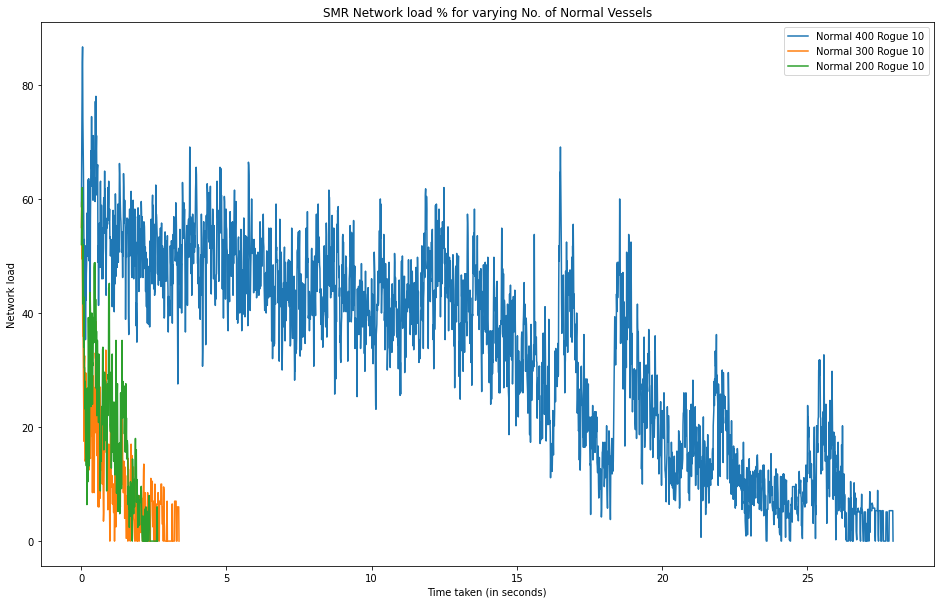

In [6]:
for i in range(df.shape[1]):
    df.iloc[:,i].plot(
        legend=True, 
        title='SMR Network load % for varying No. of Normal Vessels', 
        xlabel='Time taken (in seconds)',
        ylabel='Network load',
    )

13    AxesSubplot(0.125,0.125;0.775x0.755)
62    AxesSubplot(0.125,0.125;0.775x0.755)
36    AxesSubplot(0.125,0.125;0.775x0.755)
24    AxesSubplot(0.125,0.125;0.775x0.755)
50    AxesSubplot(0.125,0.125;0.775x0.755)
75    AxesSubplot(0.125,0.125;0.775x0.755)
41    AxesSubplot(0.125,0.125;0.775x0.755)
34    AxesSubplot(0.125,0.125;0.775x0.755)
66    AxesSubplot(0.125,0.125;0.775x0.755)
43    AxesSubplot(0.125,0.125;0.775x0.755)
42    AxesSubplot(0.125,0.125;0.775x0.755)
11    AxesSubplot(0.125,0.125;0.775x0.755)
44    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

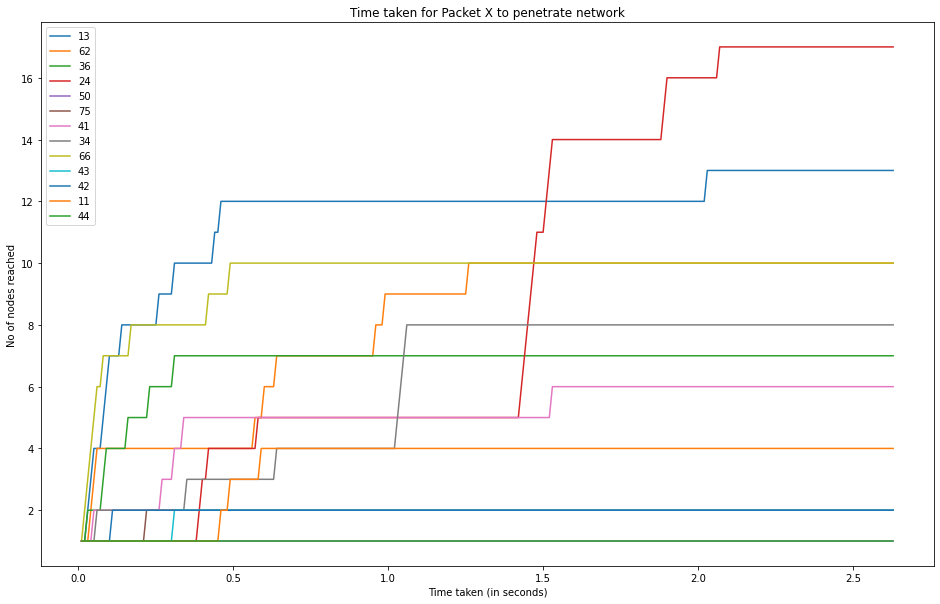

In [7]:
packet_df.T.fillna(0).apply(lambda x: x.cumsum().plot(
    legend=True,
    title='Time taken for Packet X to penetrate network',
    xlabel='Time taken (in seconds)',
    ylabel='No of nodes reached'
))

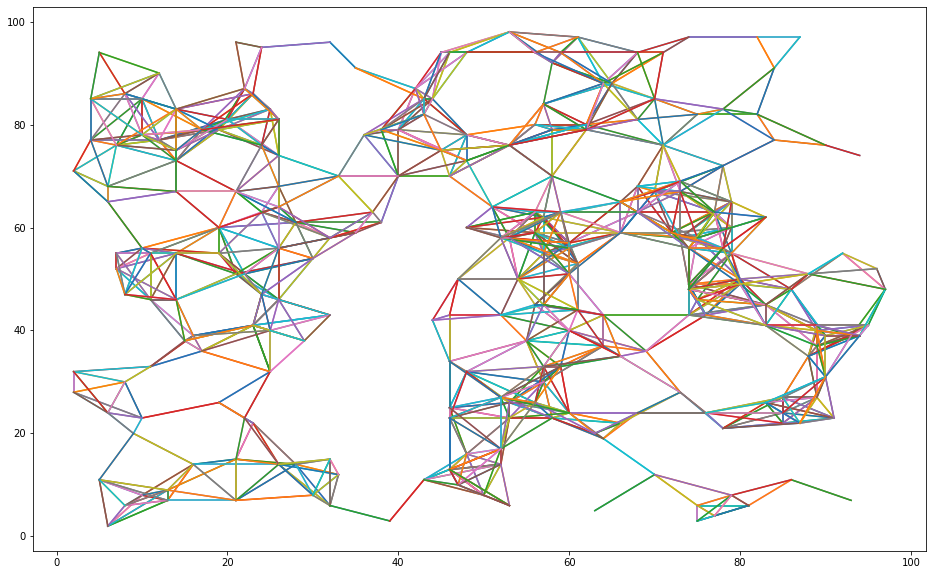

In [8]:
from utils import visualise_mesh
visualise_mesh(rplt, normal_vessels)

In [9]:
df.to_csv('./new_load_fixed_rouge.csv')

{'Normal 400 Rogue 10': 27.95, 'Normal 300 Rogue 10': 3.37, 'Normal 200 Rogue 10': 2.63}
{'Normal 400 Rogue 10': 39.01, 'Normal 300 Rogue 10': 16.35, 'Normal 200 Rogue 10': 7.21}


,SMR,VANET
Normal 400 Rogue 10,27.95,39.01
Normal 300 Rogue 10,3.37,16.35
Normal 200 Rogue 10,2.63,7.21


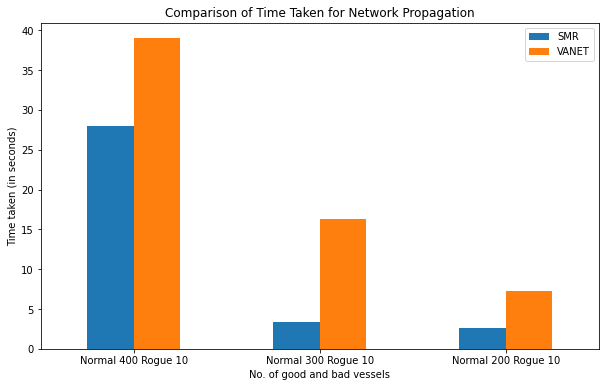

In [14]:
df1 = pd.read_csv("/home/naveennvrgup/projects/SMR-results/smr-normal.csv",index_col="Unnamed: 0")
df2 = pd.read_csv("/home/naveennvrgup/projects/SMR-results/vanet-normal.csv",index_col="Unnamed: 0")

plt.rcParams["figure.figsize"] = (10,6)

temp1={}
for x in df1.columns:
    temp1[x]=df1[~df1[x].isna()].index.max()
print(temp1)


temp2={}
for x in df2.columns:
    temp2[x]=df2[~df2[x].isna()].index.max()
print(temp2)

res_df = pd.DataFrame({'SMR':temp1,'VANET':temp2})
res_df.plot.bar(
        rot=0,         
        title='Comparison of Time Taken for Network Propagation', 
        xlabel='No. of good and bad vessels',
        ylabel='Time taken (in seconds)',)
res_df

,SMR,VANET
10,0.53,0.74
20,0.67,1.91
30,1.78,3.88
50,3.75,8.12


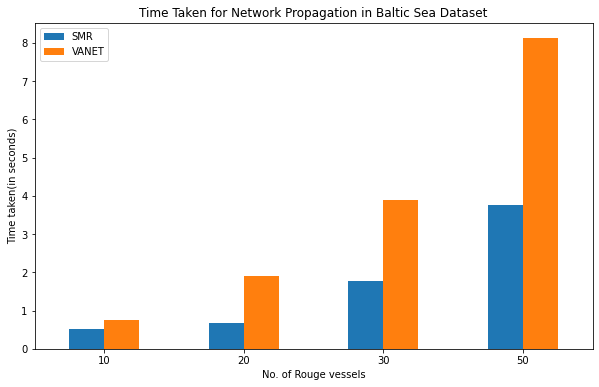

In [23]:
res_df = pd.DataFrame({
    'SMR': {
        '10': 0.53, 
        '20': 0.67, 
        '30': 1.78, 
        '50': 3.75, 
    },
    'VANET': {
        '10': 0.74, 
        '20': 1.91, 
        '30': 3.88, 
        '50': 8.12,
    }
})
    
res_df.plot.bar(
        rot=0,         
        title='Time Taken for Network Propagation in Baltic Sea Dataset', 
        xlabel='No. of Rouge vessels',
        ylabel='Time taken(in seconds)',)
res_df